In [ ]:
import pandas as pd
import missingno as msno
from numpy import isnan
import plotly.express as px
import plotly.offline as pyo
import plotly as py
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading data
df = pd.read_csv('/content/drive/MyDrive/Copy of US_accidents.csv')
#df = pd.read_csv('/content/drive/MyDrive/Capstone Project- Track Three/US_accidents.csv')
df.head()

,ID,Severity,Month,Year,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,1,3,2,2016,40.108910,-83.092860,40.112060,-83.031870,3.230,Outerbelt E,...,False,False,False,False,False,False,Night,Night,Night,Night
1,2,2,2,2016,39.865420,-84.062800,39.865010,-84.048730,0.747,I-70 E,...,False,False,False,False,False,False,Night,Night,Night,Night
2,3,2,2,2016,39.102660,-84.524680,39.102090,-84.523960,0.055,I-75 S,...,False,False,False,False,False,False,Night,Night,Night,Day
3,4,2,2,2016,41.062130,-81.537840,41.062170,-81.535470,0.123,I-77 N,...,False,False,False,False,False,False,Night,Night,Day,Day
4,5,3,2,2016,39.172393,-84.492792,39.170476,-84.501798,0.500,I-75 S,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 44 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1048575 non-null  int64  
 1   Severity               1048575 non-null  int64  
 2   Month                  1048575 non-null  int64  
 3   Year                   1048575 non-null  int64  
 4   Start_Lat              1048575 non-null  float64
 5   Start_Lng              1048575 non-null  float64
 6   End_Lat                1048575 non-null  float64
 7   End_Lng                1048575 non-null  float64
 8   Distance(mi)           1048575 non-null  float64
 9   Street                 1048574 non-null  object 
 10  Side                   1048575 non-null  object 
 11  City                   1048520 non-null  object 
 12  County                 1048575 non-null  object 
 13  State                  1048575 non-null  object 
 14  Country           

## EDA (1)

Text(0.5, 1.0, 'Data Distribution of Severity')

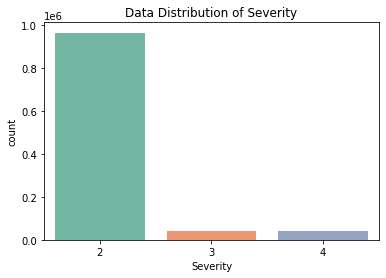

In [ ]:
# explore the distribution of Severity colums
plt.figure(figsize = (6,4))
sns.countplot(data=df, x='Severity',palette = "Set2")
plt.title("Data Distribution of Severity")

### EDA (1) - Insights
#### The chart shows the distribution of the Severity column in the dataset. The Severity of accidents ranges from 2 to 4. We can notice here that most of the accidents presented in the dataset are in the range of 2. This indicates that most accidents have the least impact on traffic.

## EDA (2)

Text(0.5, 1.0, 'Data Distribution of States')

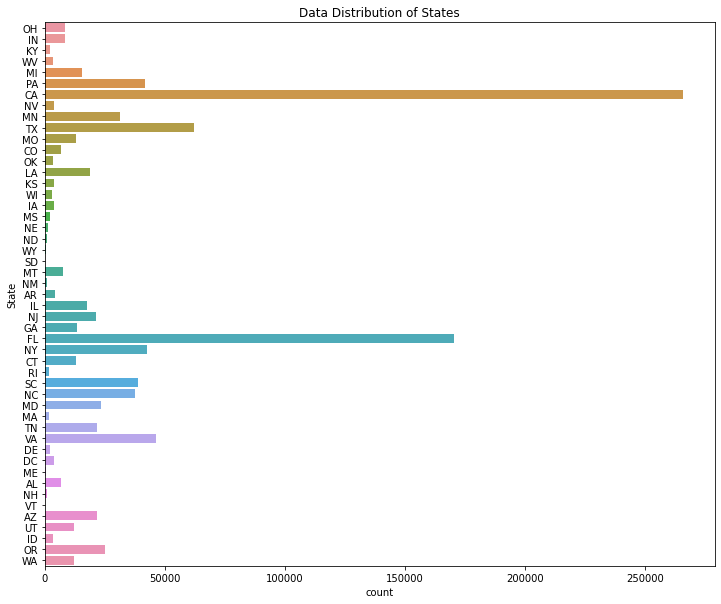

In [ ]:
# Look at the States distribution in the dataset 
plt.figure(figsize = (12,10))
sns.countplot(data=df, y='State')
plt.title("Data Distribution of States")

### EDA (2) - Insights
#### Here we explored the state column, we can notice that most of the data are in state of California and Florida.

## EDA (3)

Text(0.5, 1.0, 'Relationship between States and Severity')

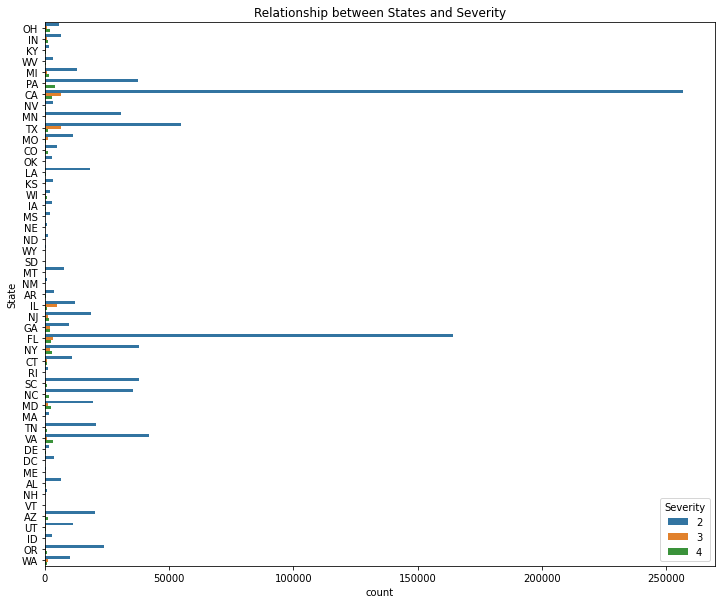

In [ ]:
# Let us explore the relationship between state and Severity
plt.figure(figsize = (12,10))
sns.countplot(data=df, y='State', hue='Severity')
plt.title("Relationship between States and Severity")

### EDA (3) - Insights
#### In this chart, we explored the relationship between two columns state and severity. As we can see that the state of Pennsylvania has the most severe accidents compared with other states presented in the dataset.

## EDA (4)

Text(0.5, 1.0, ' Period of Accident Occurrence -Day and Night')

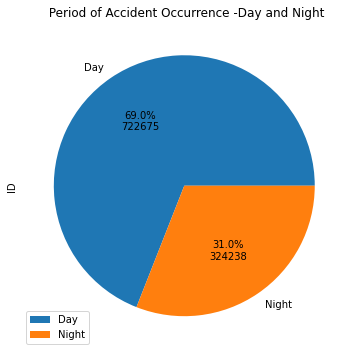

In [ ]:
# Finding the number and percentage of accidents during the "day" and "night".

def fmt(x):
  return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

total = df['Sunrise_Sunset'].value_counts().values.sum()

df.groupby(['Sunrise_Sunset']).sum().plot(kind='pie', y='ID',fontsize=10,figsize=(8,6),autopct=fmt )
plt.title(" Period of Accident Occurrence - Day and Night")

### EDA (4) - Insights
#### The pie chart shows that 69% of accesdents occurred during the day. 

## EDA (5)

Text(0.5, 1.0, 'Number of Accidents in each Year')

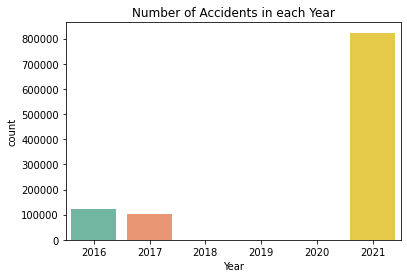

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(data=df, x='Year',palette = "Set2")
plt.title("Number of Accidents in each Year")

### EDA (5) - Insights
#### In this chart, we explored the number of accidents each year. we can notice that 2021 has the highest number of accidents compared with the past five years. 

In [ ]:
fig = px.pie(df, names ='Month', color_discrete_sequence = px.colors.sequential.dense)
fig.update_layout(
    title={
        'text': "Month",
        'y':0.1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In this pie chart, we want to know the accident distribution for the months. Since December is a holiday season and usually snowy, it's not surprising that there are more accidents in December, accounting for 18% of all incidents.

In [ ]:
df['Wind_Speed(mph)'].value_counts()

0.0      144029
5.0       82518
6.0       80800
3.0       78402
7.0       74932
          ...  
81.7          1
49.5          1
48.3          1
100.1         1
186.0         1
Name: Wind_Speed(mph), Length: 109, dtype: int64

Text(0.5, 1.0, 'Wind Speed(mph) and Severity')

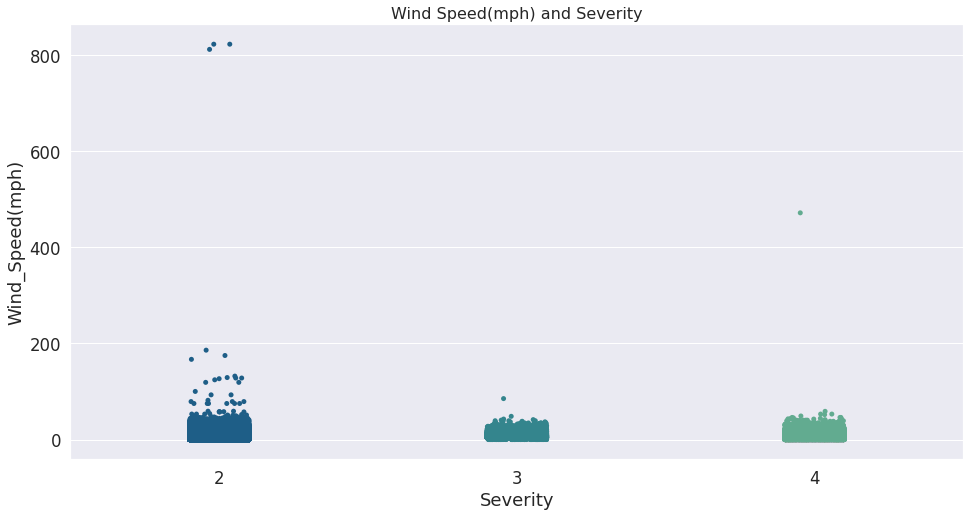

In [ ]:
plt.figure(figsize=(16,8))
sns.set(font_scale=1.5)
sns.stripplot(data=df,x ='Severity', y="Wind_Speed(mph)" ,palette = 'crest_r',dodge=True, size=5)
plt.title("Wind Speed(mph) and Severity", size = 16)

In this plot, we want to study the relationships between wind speed and the severity of an accident. And as we can see, there is no clear connection between wind speed and severity. However, we discovered that the wind speed contains outliers, and we must eliminate them during the data preprocessing stage.

Text(0.5, 1.0, 'Humidity and Severity')

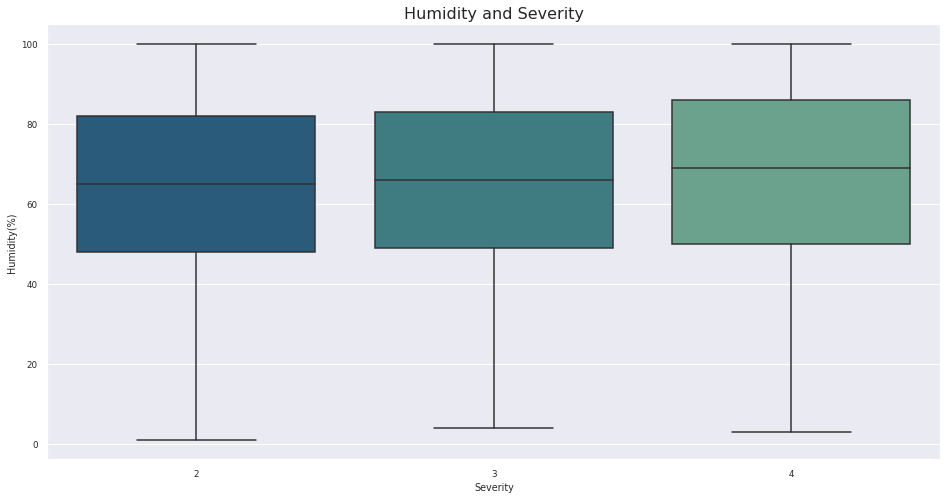

In [ ]:
plt.figure(figsize=(16,8))
sns.set(font_scale=0.8)
sns.boxplot(data=df, y='Humidity(%)', x="Severity",palette='crest_r')
plt.title("Humidity and Severity", size = 16)

This box plot shows the link between humidity and the severity of an accident. The levels of humidity range from 2 to 100. However, the majority are in the 50–80 range. and we noticed that there is some sort of linear relationship between the severity and the humidity. We believe this is related to the accident's location. There are more accidents in the coastal states, and they have higher humidity rates than in the middle states in the US.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Wind Direction')

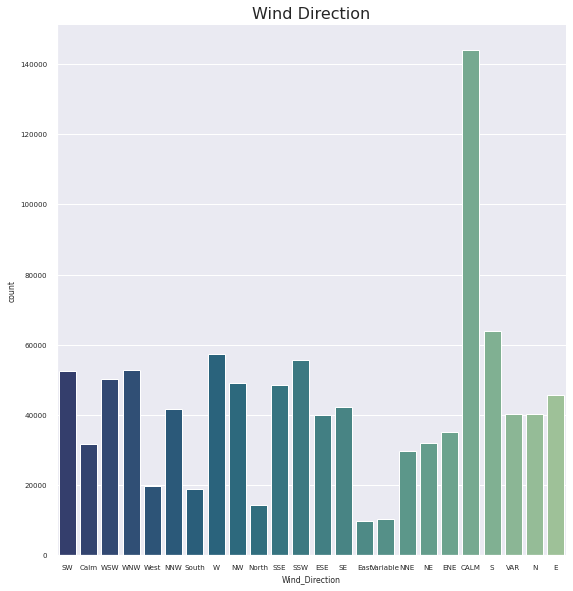

In [ ]:
sns.set(font_scale=0.65)
sns.catplot("Wind_Direction", data=df, kind="count", height=8,palette = 'crest_r')
plt.title("Wind Direction", size = 16)

We investigated the number of accidents and the wind directions in this graph. We can conclude that there is no clear relation between wind direction and accidents because the majority of incidents occurred while the wind was calm.

In [ ]:
import folium
from folium.plugins import HeatMap
m=folium.Map([40.7128,-100.0060],zoom_start=5)
HeatMap(df[['Start_Lat','Start_Lng']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

This heatmap shows us the accident's exact location. we utilize the longitude and the latitude columns in this chart to visualize the locations. we can see that accidents happen across all states and cities. We can notice that the state of South Dakota has a really low rate of accidents. On the other hand, and because of their dense populations, cities like New York, Washington, and Los Angeles have greater accident rates than other cities.

In [ ]:
df['Visibility(mi)'].value_counts()

Text(0.5, 1.0, 'Visibility and Severity')

<Figure size 1440x1152 with 0 Axes>

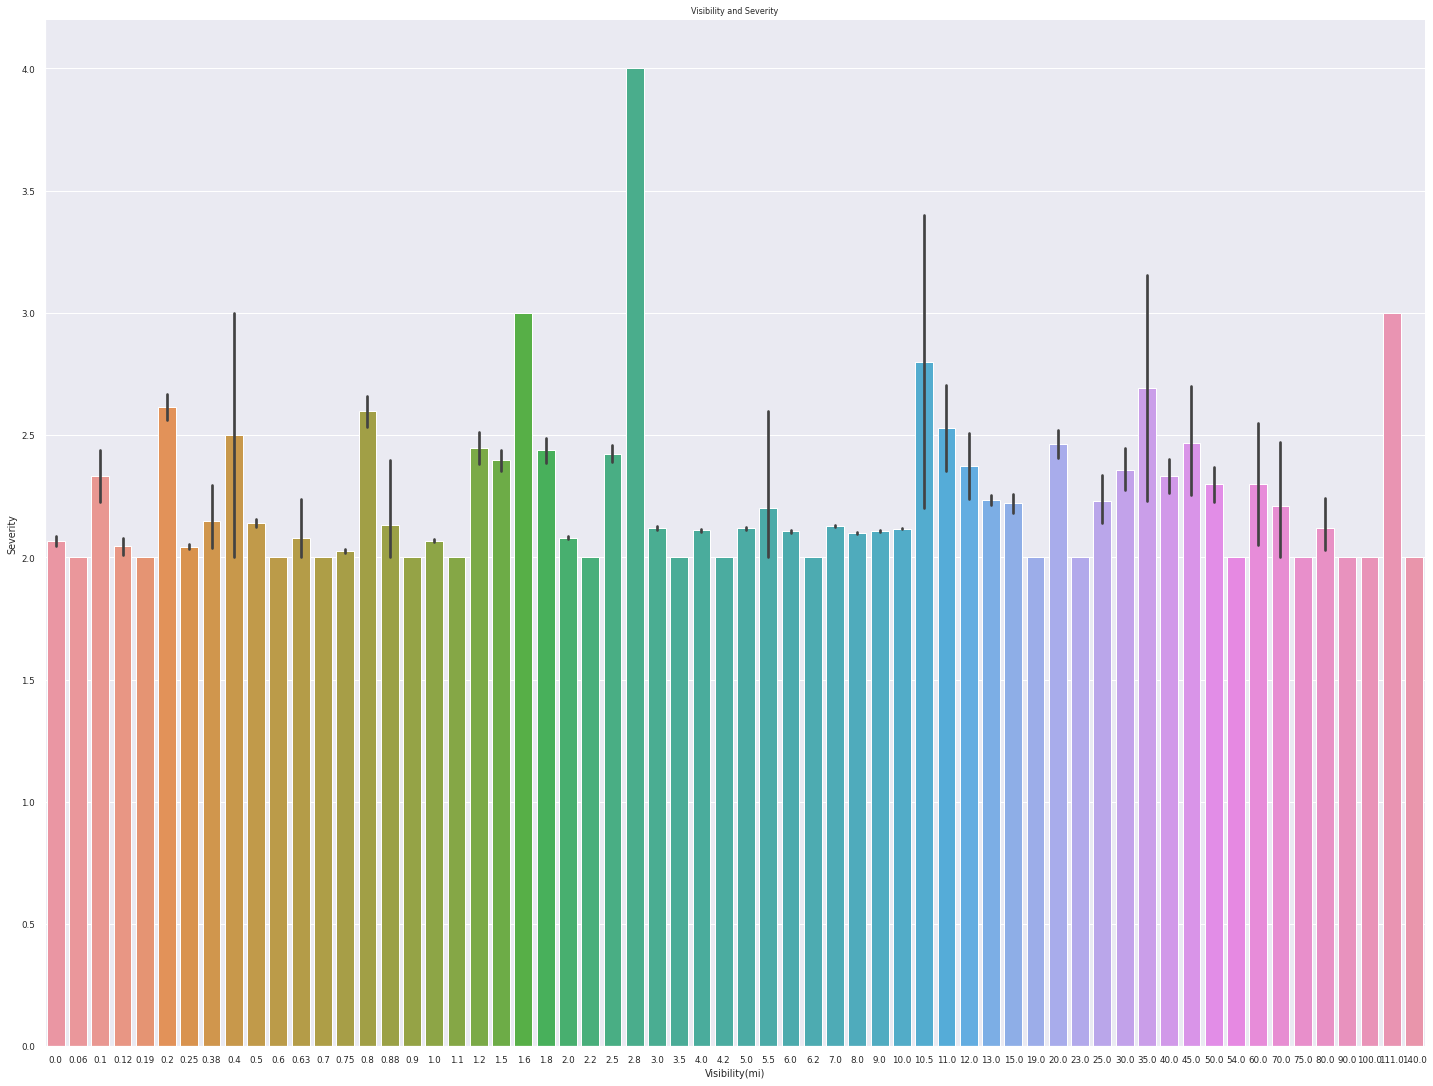

In [ ]:
plt.figure(figsize=(20,16))
sns.set(font_scale=0.8)
sns.catplot(data=df, kind="bar", y="Severity",
       x="Visibility(mi)",height = 15, aspect =20/15)
plt.title("Visibility and Severity", size = 8)

This graphic shows the relationship between visibility and accident severity, and it can be concluded that there is no correlation directly relating visibility to accident severity. However, we have a high rate of accidents with a severity of 4 when the visibility is 3 miles, and a high rate of accidents with a severity of 3 when the visibility is 1.6 miles.